# 3-生成和旋转三角形和六边形栅格

在这个例子中，我们将介绍更多的 `TransBigData`栅格处理选项，包括。
- 添加旋转角度
- 三角形和六角形栅格

## 旋转栅格

In [1]:
#读取出租车数据
import transbigdata as tbd
import pandas as pd
data = pd.read_csv('../../../example/data/TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','time','lon','lat','OpenStatus','Speed'] 
#设定研究范围
bounds = [113.75, 22.4, 114.62, 22.86]
#删除范围外的数据
data = tbd.clean_outofbounds(data,bounds = bounds,col = ['lon','lat'])

`TransBigData` 提供的栅格坐标系统也支持为栅格添加旋转角度,你可以通过在栅格参数中加入 `theta` 来指定栅格的旋转角度。

In [3]:
#获取栅格参数
params = tbd.area_to_params(bounds,accuracy = 1000)
#增加一个旋转角度
theta = 5
params

{'slon': 113.75,
 'slat': 22.4,
 'deltalon': 0.00974336289289822,
 'deltalat': 0.008993210412845813,
 'theta': 0,
 'method': 'rect',
 'gridsize': 1000}

<AxesSubplot:>

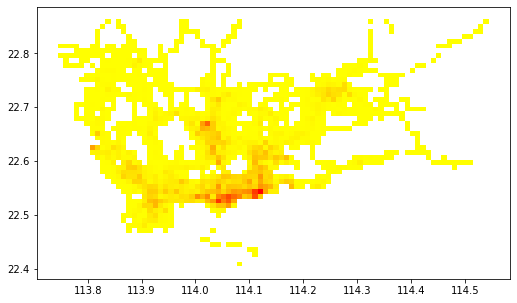

In [5]:
#将GPS数据匹配至栅格
data['LONCOL'],data['LATCOL'] = tbd.GPS_to_grid(data['lon'],data['lat'],params)
#将数据集计
grid_agg = data.groupby(['LONCOL','LATCOL'])['VehicleNum'].count().reset_index()
#生成栅格几何信息
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['LONCOL'],grid_agg['LATCOL']],params)
#转换为GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#绘制栅格
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))

## 三角形和六边形栅格的生成与数据对应

通过设定栅格参数的method选项，可以指定生成三角形和六边形栅格

In [6]:
#三角形栅格
params['method'] = 'tri'

三角形栅格需要用三列存放栅格ID

<AxesSubplot:>

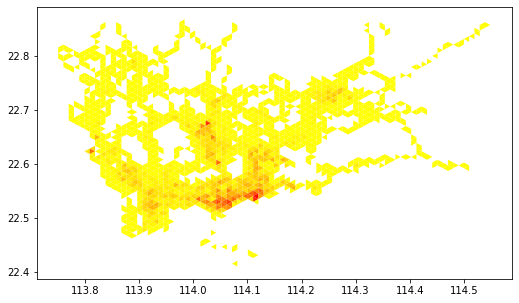

In [7]:
#将GPS数据匹配至栅格
data['loncol_1'],data['loncol_2'],data['loncol_3'] = tbd.GPS_to_grid(data['lon'],data['lat'],params)
#将数据集计
grid_agg = data.groupby(['loncol_1','loncol_2','loncol_3'])['VehicleNum'].count().reset_index()
#生成栅格几何信息
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['loncol_1'],grid_agg['loncol_2'],grid_agg['loncol_3']],params)
#转换为GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#绘制栅格
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))

In [8]:
#六边形栅格
params['method'] = 'hexa'

<AxesSubplot:>

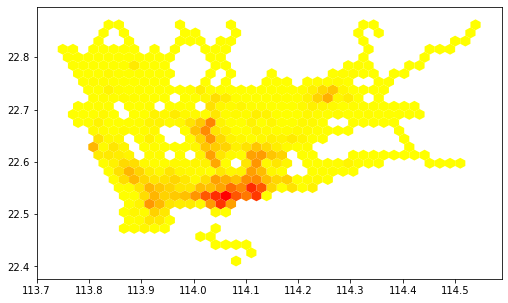

In [9]:
#将GPS数据匹配至栅格
data['loncol_1'],data['loncol_2'],data['loncol_3'] = tbd.GPS_to_grid(data['lon'],data['lat'],params)
#将数据集计
grid_agg = data.groupby(['loncol_1','loncol_2','loncol_3'])['VehicleNum'].count().reset_index()
#生成栅格几何信息
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['loncol_1'],grid_agg['loncol_2'],grid_agg['loncol_3']],params)
#转换为GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#绘制栅格
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))